# Chapter 9 - Support Vector Machines

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.lda import LDA
from sklearn.metrics import confusion_matrix, roc_curve, auc

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%config InlineBackend.figure_formats = {'png',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Figure 9.10

In [2]:
df = pd.read_csv('Data/Heart.csv').dropna().drop('Unnamed: 0', axis=1)
df.ChestPain = pd.factorize(df.ChestPain)[0]
df.Thal = pd.factorize(df.Thal)[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null int32
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null int32
AHD          297 non-null object
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 31.3+ KB


In [18]:
X = df.drop('AHD', axis=1)
y = pd.factorize(df.AHD)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=207)

In [19]:
# Support Vector Classifier
#svc = SVC(kernel='linear')
svc = LinearSVC()
y_train_score_svc = svc.fit(X_train, y_train.ravel()).decision_function(X_train)

fpr_svc, tpr_svc, _ = roc_curve(y_train, y_train_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# LDA
lda = LDA()
lda.fit(X_train, y_train)

y_train_score_lda = lda.fit(X_train, y_train).decision_function(X_train)

fpr_lda, tpr_lda, _ = roc_curve(y_train, y_train_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

In [20]:
# SVC Kernel 1
svc_k1 = SVC(kernel='rbf', gamma=10**-1)
y_train_score_svc_k1 = svc_k1.fit(X_train, y_train.ravel()).decision_function(X_train)

fpr_svc_k1, tpr_svc_k1, _ = roc_curve(y_train, y_train_score_svc_k1)
roc_auc_svc_k1 = auc(fpr_svc_k1, tpr_svc_k1)

In [21]:
# SVC Kernel 2
svc_k2 = SVC(kernel='rbf', gamma=10**-2)
y_train_score_svc_k2 = svc_k2.fit(X_train, y_train.ravel()).decision_function(X_train)

fpr_svc_k2, tpr_svc_k2, _ = roc_curve(y_train, y_train_score_svc_k2)
roc_auc_svc_k2 = auc(fpr_svc_k2, tpr_svc_k2)

In [22]:
# SVC Kernel 3
svc_k3 = SVC(kernel='rbf', gamma=10**-3)
y_train_score_svc_k3 = svc_k3.fit(X_train, y_train.ravel()).decision_function(X_train)

fpr_svc_k3, tpr_svc_k3, _ = roc_curve(y_train, y_train_score_svc_k3)
roc_auc_svc_k3 = auc(fpr_svc_k3, tpr_svc_k3)

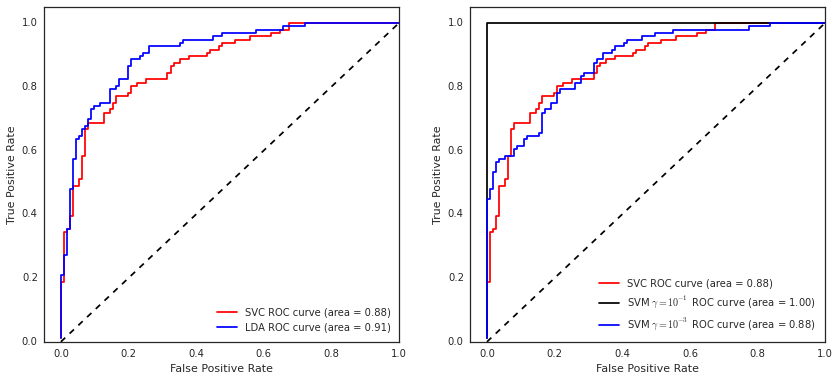

In [23]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc, color='r')
ax1.plot(fpr_lda, tpr_lda, label='LDA ROC curve (area = %0.2f)' % roc_auc_lda, color='b')

ax2.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc, color='r')
ax2.plot(fpr_svc_k1, tpr_svc_k1, label='SVM $\gamma = 10^{-1}$ ROC curve (area = %0.2f)' % roc_auc_svc_k1, color='k')
#ax2.plot(fpr_svc_k2, tpr_svc_k2, label='SVM $\gamma = 10^{-2}$ ROC curve (area = %0.2f)' % roc_auc_svc_k2, color='g')
ax2.plot(fpr_svc_k3, tpr_svc_k3, label='SVM $\gamma = 10^{-3}$ ROC curve (area = %0.2f)' % roc_auc_svc_k3, color='b')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

### Figure 9.11

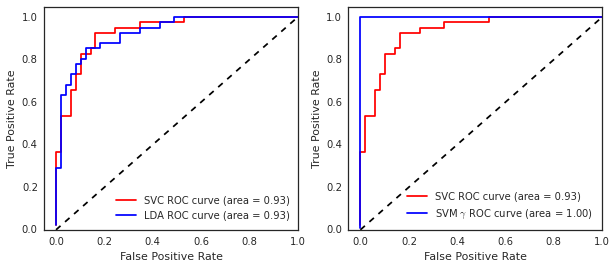

In [24]:
# SVC
y_test_score_svc = svc.fit(X_train, y_train.ravel()).decision_function(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_test_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# LDA
y_test_score_lda = lda.fit(X_train, y_train).decision_function(X_test)

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_test_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# SVC Kernel d=1
svc_k1 = SVC(kernel='poly', degree=1)
y_test_score_svc_k1 = svc_k1.fit(X_train, y_train.ravel()).decision_function(X_test)

fpr_svc_k1, tpr_svc_k1, _ = roc_curve(y_train, y_train_score_svc_k1)
roc_auc_svc_k1 = auc(fpr_svc_k1, tpr_svc_k1)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc, color='r')
ax1.plot(fpr_lda, tpr_lda, label='LDA ROC curve (area = %0.2f)' % roc_auc_lda, color='b')

ax2.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc, color='r')
ax2.plot(fpr_svc_k1, tpr_svc_k1, label='SVM $\gamma$ ROC curve (area = %0.2f)' % roc_auc_svc_k1, color='b')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

## LAB

### § 9.6.1 Support Vector Classifier

Define a function to plot a classifier with support vectors.

In [137]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Generating random data: 20 observations of 2 features and divide into two classes.

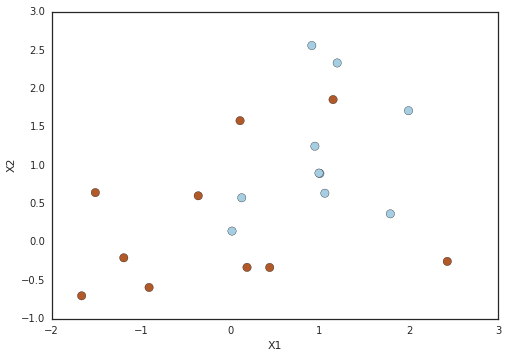

In [135]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

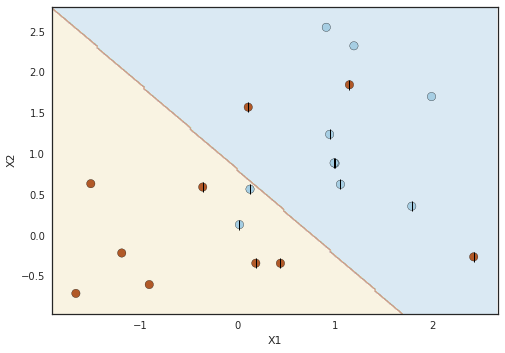

Number of support vectors:  13


In [138]:
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.

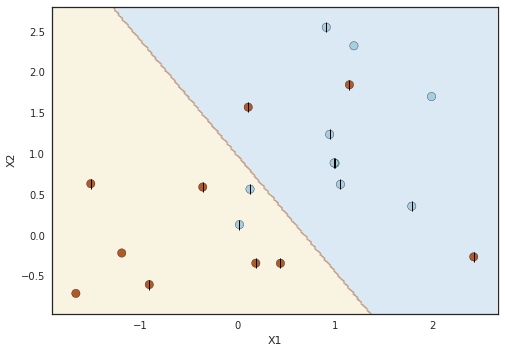

Number of support vectors:  16


In [139]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [140]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.grid_scores_

[mean: 0.80000, std: 0.24495, params: {'C': 0.001},
 mean: 0.80000, std: 0.24495, params: {'C': 0.01},
 mean: 0.80000, std: 0.24495, params: {'C': 0.1},
 mean: 0.75000, std: 0.33541, params: {'C': 1},
 mean: 0.75000, std: 0.33541, params: {'C': 5},
 mean: 0.75000, std: 0.33541, params: {'C': 10},
 mean: 0.75000, std: 0.33541, params: {'C': 100}]

In [141]:
clf.best_params_

{'C': 0.001}

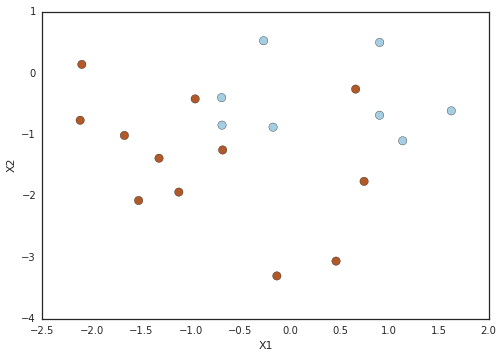

In [142]:
# Generating test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)

X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [143]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

    -1   1
-1   2   6
 1   0  12

In [144]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.01
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

    -1   1
-1   2   6
 1   0  12

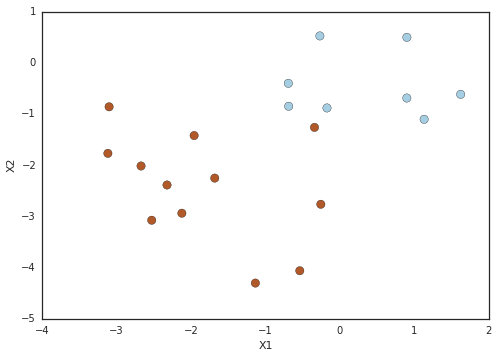

In [145]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [146]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

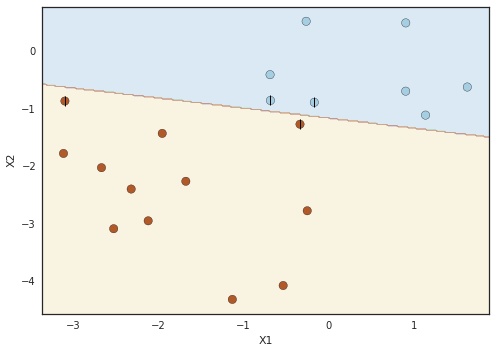

Number of support vectors:  4


In [147]:
plot_svc(svc4, X_test, y_test)

In [149]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

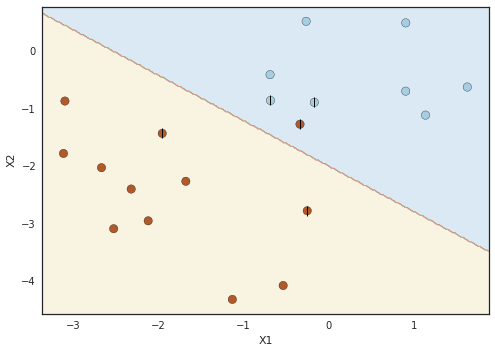

Number of support vectors:  5


In [150]:
plot_svc(svc5, X_test, y_test)

### § 9.6.5 Application to Gene Expression Data

In R, I exported the dataset from package 'ISLR' to csv files.

In [3]:
X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

In [4]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [5]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [23]:
# This model gives identical results to the svm() of the R package e1071, also based on libsvm library.
svc = SVC(kernel='linear')

# This model is based on liblinear library and gives 100 score on the test data. 
#svc = LinearSVC()

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [25]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
